In [1]:
import numpy as np
import time

# Initialize parameters
sampling_rate = 1000
window_size = 1000  # Number of samples in each window
update_interval = 1  # Interval in seconds

# Initialize data
emg_data = np.random.rand(window_size)

# Function to update and print frequencies
def update():
    global emg_data

    while True:
        # Simulate new data acquisition
        new_data = np.random.rand(10)  # Simulate 10 new data points
        emg_data = np.concatenate((emg_data[10:], new_data))

        # Compute FFT and power spectrum
        n = len(emg_data)
        frequencies = np.fft.rfftfreq(n, d=1/sampling_rate)
        fft_magnitude = np.abs(np.fft.rfft(emg_data))
        power_spectrum = fft_magnitude ** 2

        # Calculate mean and median frequencies
        mean_frequency = np.sum(frequencies * power_spectrum) / np.sum(power_spectrum)
        cumulative_power = np.cumsum(power_spectrum)
        total_power = cumulative_power[-1]
        median_frequency = frequencies[np.where(cumulative_power >= total_power/2)[0][0]]

        # Print mean and median frequencies
        print(f"Mean Frequency: {mean_frequency:.2f} Hz, Median Frequency: {median_frequency:.2f} Hz")

        # Wait for the next update
        time.sleep(update_interval)

# Start the update loop
update()

Mean Frequency: 39.06 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 38.83 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 38.86 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 38.62 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 38.96 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 38.84 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 38.73 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 38.96 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 38.75 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 38.23 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 38.19 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 38.22 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 38.32 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 38.50 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 37.76 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 37.85 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 37.79 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 37.62 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 37.27 Hz, Median Frequency: 0.00 Hz
Mean Frequen

KeyboardInterrupt: 

## PARA SINAIS JA CENTRADOS

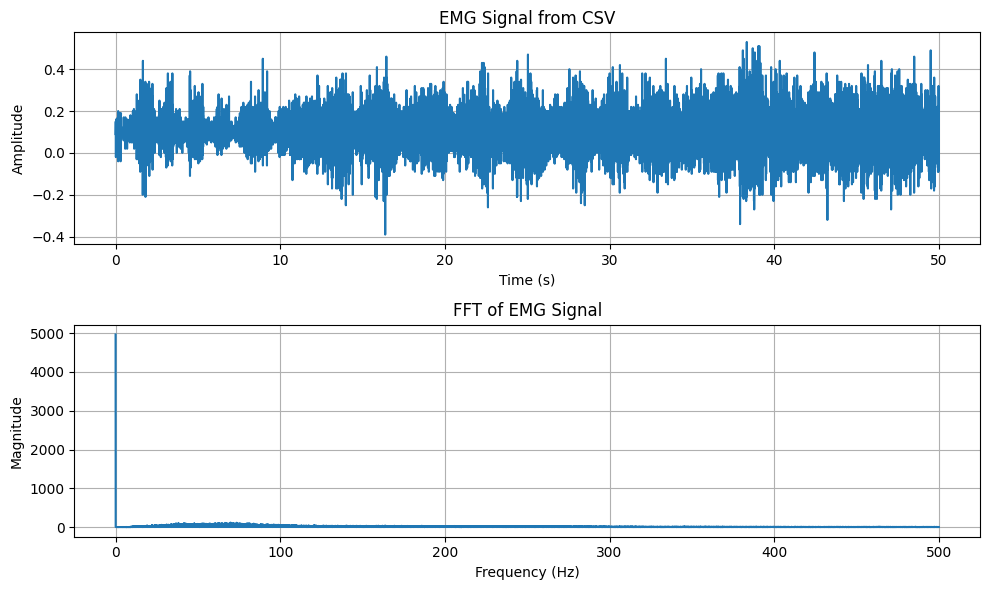

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read the signal from the CSV file
data = pd.read_csv('emg1_data.csv')
emg_signal = data['Raw Emg'].values.flatten()  # Assuming the column name is 'signal'

# Parameters for the signal
sampling_rate = 1000  # Adjust this according to your data
n = len(emg_signal)
t = np.linspace(0, n / sampling_rate, n, endpoint=False)

# Compute FFT and power spectrum
fft_frequencies = np.fft.rfftfreq(n, d=1/sampling_rate)
fft_magnitude = np.abs(np.fft.rfft(emg_signal))

# Plot the EMG signal
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, emg_signal)
plt.title('EMG Signal from CSV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the FFT graph
plt.subplot(2, 1, 2)
plt.plot(fft_frequencies, fft_magnitude)
plt.title('FFT of EMG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()

## PARA SINAIS NAO CENTRADOS

Mean Frequency: 83.89 Hz
Median Frequency: 69.76 Hz


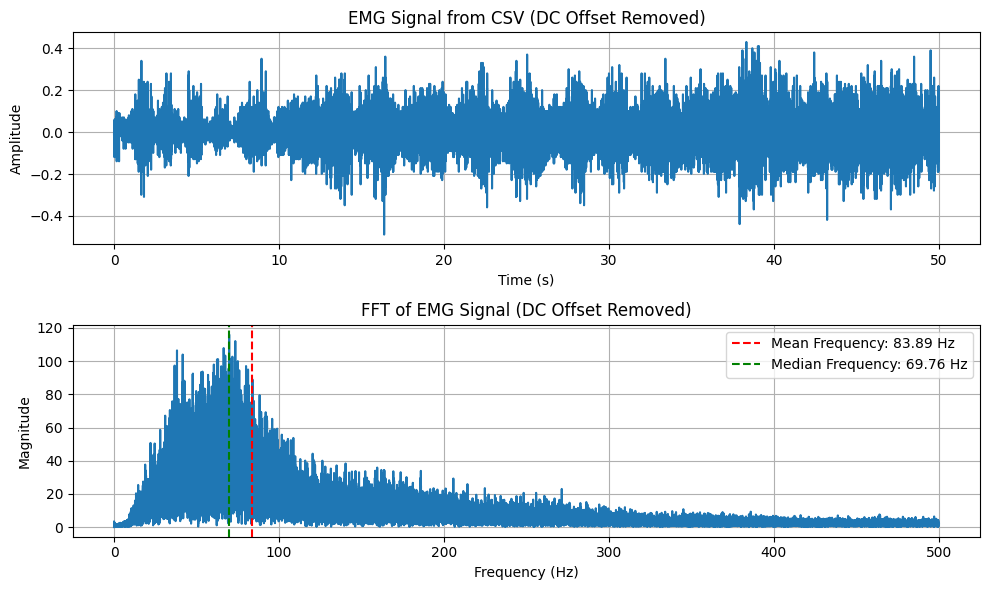

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#Read the signal from the CSV file without headers
data = pd.read_csv('emg1_data.csv') 
emg_signal = data['Raw Emg'].values.flatten() # Assuming the column name is 'signal'

#Remove DC offset
emg_signal_zero_mean = emg_signal - np.mean(emg_signal)

#Parameters for the signal
sampling_rate = 1000 # Adjust this according to your data n = len(emg_signal_zero_mean) t = np.linspace(0, n / sampling_rate, n, endpoint=False)

#Compute FFT and power spectrum
fft_frequencies = np.fft.rfftfreq(n, d=1/sampling_rate) 
fft_magnitude = np.abs(np.fft.rfft(emg_signal_zero_mean)) 
power_spectrum = fft_magnitude ** 2

#Calculate mean frequency
mean_frequency = np.sum(fft_frequencies * power_spectrum) / np.sum(power_spectrum)

#Calculate median frequency
cumulative_power = np.cumsum(power_spectrum) 
total_power = cumulative_power[-1] 
median_frequency = fft_frequencies[np.where(cumulative_power >= total_power / 2)[0][0]]

#Print mean and median frequencies
print(f"Mean Frequency: {mean_frequency:.2f} Hz") 
print(f"Median Frequency: {median_frequency:.2f} Hz")

#Plot the EMG signal
plt.figure(figsize=(10, 6)) 
plt.subplot(2, 1, 1) 
plt.plot(t, emg_signal_zero_mean) 
plt.title('EMG Signal from CSV (DC Offset Removed)') 
plt.xlabel('Time (s)') 
plt.ylabel('Amplitude') 
plt.grid(True)

#Plot the FFT graph
plt.subplot(2, 1, 2) 
plt.plot(fft_frequencies, fft_magnitude) 
plt.axvline(mean_frequency, color='r', linestyle='--', label=f'Mean Frequency: {mean_frequency:.2f} Hz') 
plt.axvline(median_frequency, color='g', linestyle='--', label=f'Median Frequency: {median_frequency:.2f} Hz') 
plt.title('FFT of EMG Signal (DC Offset Removed)') 
plt.xlabel('Frequency (Hz)') 
plt.ylabel('Magnitude') 
plt.legend() 
plt.grid(True)

plt.tight_layout() 
plt.show()

/tmp/ipykernel_1771/2684340190.py:66: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


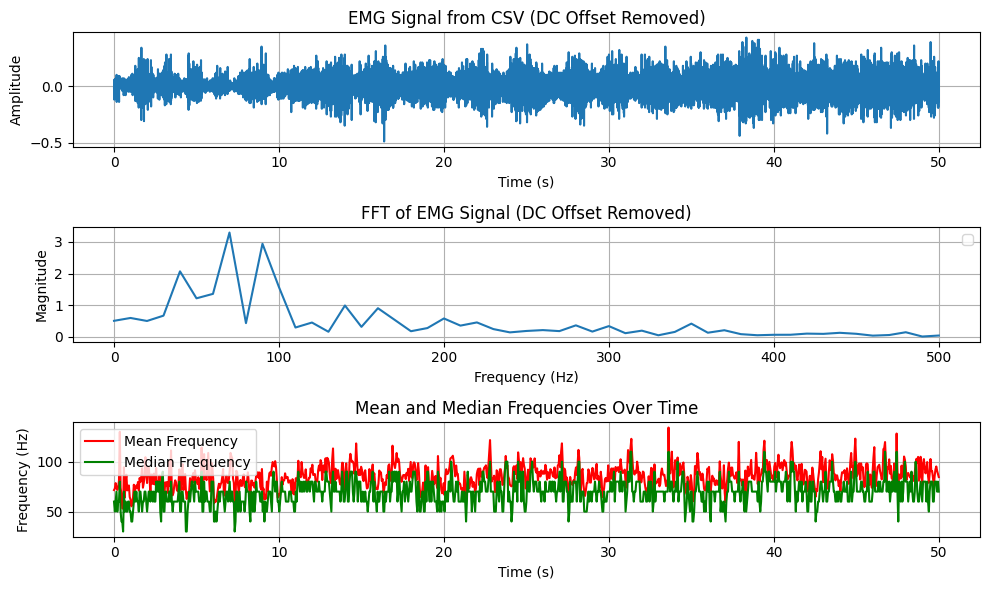

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read the signal from the CSV file without headers
data = pd.read_csv('emg1_data.csv')
emg_signal = data['Raw Emg'].values.flatten()  # Assuming the column name is 'Raw Emg'

# Remove DC offset
emg_signal_zero_mean = emg_signal - np.mean(emg_signal)

# Parameters for the signal
sampling_rate = 1000  # Adjust this according to your data
window_size = 100  # Window size for FFT
overlap = 0.5  # 50% overlap
step_size = int(window_size * (1 - overlap))
n = len(emg_signal_zero_mean)

# Initialize lists to store results
mean_frequencies = []
median_frequencies = []
fft_frequencies = np.fft.rfftfreq(window_size, d=1/sampling_rate)
all_fft_magnitudes = []

# Process the signal in windows
for start in range(0, n - window_size + 1, step_size):
    window = emg_signal_zero_mean[start:start + window_size]
    
    # Compute FFT and power spectrum
    fft_magnitude = np.abs(np.fft.rfft(window))
    power_spectrum = fft_magnitude ** 2
    
    # Calculate mean frequency
    mean_frequency = np.sum(fft_frequencies * power_spectrum) / np.sum(power_spectrum)
    mean_frequencies.append(mean_frequency)
    
    # Calculate median frequency
    cumulative_power = np.cumsum(power_spectrum)
    total_power = cumulative_power[-1]
    median_frequency = fft_frequencies[np.where(cumulative_power >= total_power / 2)[0][0]]
    median_frequencies.append(median_frequency)
    
    # Store FFT magnitudes
    all_fft_magnitudes.append(fft_magnitude)

# Convert lists to arrays for plotting
mean_frequencies = np.array(mean_frequencies)
median_frequencies = np.array(median_frequencies)
all_fft_magnitudes = np.array(all_fft_magnitudes)

# Plot the EMG signal
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(np.linspace(0, n / sampling_rate, n), emg_signal_zero_mean)
plt.title('EMG Signal from CSV (DC Offset Removed)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the FFT graph
plt.subplot(3, 1, 2) 
plt.plot(fft_frequencies, fft_magnitude) 
plt.title('FFT of EMG Signal (DC Offset Removed)') 
plt.xlabel('Frequency (Hz)') 
plt.ylabel('Magnitude') 
plt.legend() 
plt.grid(True)

# Plot the mean and median frequencies
plt.subplot(3, 1, 3)
time_windows = np.linspace(0, n / sampling_rate, len(mean_frequencies))
plt.plot(time_windows, mean_frequencies, label='Mean Frequency', color='r')
plt.plot(time_windows, median_frequencies, label='Median Frequency', color='g')
plt.title('Mean and Median Frequencies Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()